In [8]:
import pandas as pd

# Load datasets
ham_path = r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\archive (2)\HAM10000_metadata.csv'
isic_path = r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\isic\ISIC_2020_Training_GroundTruth.csv'

ham_df = pd.read_csv(ham_path)
isic_df = pd.read_csv(isic_path)






In [14]:
import pandas as pd

# Load HAM10000 dataset
ham_path = r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\archive (2)\HAM10000_metadata.csv'
ham_df = pd.read_csv(ham_path)

# Add 'target' column based on conditions
ham_df['target'] = ham_df['dx'].apply(lambda x: 1 if x == 'mel' else 0)

# Rename columns
ham_df.rename(columns={'image_id': 'image_name', 'localization': 'site'}, inplace=True)

# Drop 'dx' and 'dx_type' columns
ham_df.drop(['dx', 'dx_type'], axis=1, inplace=True)

# Display the updated dataset
print(ham_df.head())

     lesion_id    image_name   age   sex   site  target
0  HAM_0000118  ISIC_0027419  80.0  male  scalp       0
1  HAM_0000118  ISIC_0025030  80.0  male  scalp       0
2  HAM_0002730  ISIC_0026769  80.0  male  scalp       0
3  HAM_0002730  ISIC_0025661  80.0  male  scalp       0
4  HAM_0001466  ISIC_0031633  75.0  male    ear       0


In [18]:
# Change column names
isic_df.rename(columns={'patient_id': 'lesion_id',
                        'age_approx': 'age',
                        'anatom_site_general_challenge': 'site'},
               inplace=True)

# Remove columns
isic_df.drop(['diagnosis', 'benign_malignant'], axis=1, inplace=True)

# Reorder columns
isic_df = isic_df[['lesion_id', 'image_name', 'age', 'sex', 'site', 'target']]

# Display the updated dataset
print(isic_df.head())

    lesion_id    image_name   age     sex             site  target
0  IP_7279968  ISIC_2637011  45.0    male        head/neck       0
1  IP_3075186  ISIC_0015719  45.0  female  upper extremity       0
2  IP_2842074  ISIC_0052212  50.0  female  lower extremity       0
3  IP_6890425  ISIC_0068279  45.0  female        head/neck       0
4  IP_8723313  ISIC_0074268  55.0  female  upper extremity       0


In [19]:
# Merge datasets
merged_df = pd.concat([ham_df, isic_df], ignore_index=True)

# Display the merged dataset
print(merged_df.head())

     lesion_id    image_name   age   sex   site  target
0  HAM_0000118  ISIC_0027419  80.0  male  scalp       0
1  HAM_0000118  ISIC_0025030  80.0  male  scalp       0
2  HAM_0002730  ISIC_0026769  80.0  male  scalp       0
3  HAM_0002730  ISIC_0025661  80.0  male  scalp       0
4  HAM_0001466  ISIC_0031633  75.0  male    ear       0


In [24]:
merged_df.shape

(43141, 6)

In [25]:
isic_df.shape

(33126, 6)

In [26]:
ham_df.shape

(10015, 6)

In [27]:
merged_df.to_csv(r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\merged_dataset.csv', index=False)

In [34]:
isic_df['target'].value_counts().get(1, 0)

584

In [11]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import shutil

# Load the metadata
metadata_path = r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\merged_dataset.csv'
metadata = pd.read_csv(metadata_path)


# Merge metadata with the dataset based on a common key, for example, 'id'
merged_data = metadata

# Separate the dataset based on the target value
target_0 = merged_data[merged_data['target'] == 0]
target_1 = merged_data[merged_data['target'] == 1]

# Remove 50% of target 0 datasets
target_0_sample = target_0.sample(frac=0.7, random_state=42)
target_0_remaining = target_0.drop(target_0_sample.index)

# Split the datasets into train and test
train_target_0, test_target_0 = train_test_split(target_0_remaining, test_size=0.3, random_state=42)
train_target_1, test_target_1 = train_test_split(target_1, test_size=0.3, random_state=42)

# Concatenate the train and test datasets
train_data = pd.concat([train_target_0, train_target_1])
test_data = pd.concat([test_target_0, test_target_1])

# Create folders if they don't exist
train_folder = r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\train_folder'
test_folder = r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\test_folder'

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Save the train and test datasets to CSV files
train_data.to_csv(os.path.join(train_folder, 'train_dataset.csv'), index=False)
test_data.to_csv(os.path.join(test_folder, 'test_dataset.csv'), index=False)

# Filter and copy images based on the train and test datasets
def copy_images(src_folder, dest_folder, dataset):
    os.makedirs(dest_folder, exist_ok=True)
    for index, row in dataset.iterrows():
        image_name = row['image_name']+ '.jpg' 
        src_path = os.path.join(src_folder, image_name)
        dest_path = os.path.join(dest_folder, image_name)
        shutil.copy(src_path, dest_path)

# Assuming your images are in a folder named 'images_folder'
images_folder = r'C:\Users\ruthv\Documents\amrita documents\sem7\final_year\merged_dataset'

# Copy train and test images to new folders
copy_images(images_folder, train_folder, train_data)
copy_images(images_folder, test_folder, test_data)


In [13]:
test_data.columns

Index(['lesion_id', 'image_name', 'age', 'sex', 'site', 'target'], dtype='object')

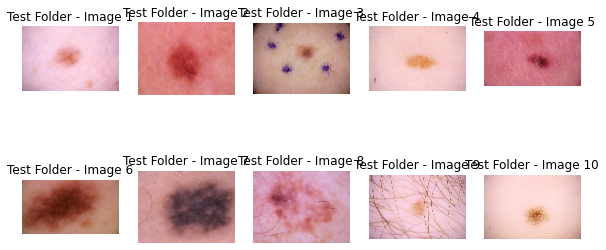

In [14]:
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV files into pandas DataFrames
test_df = pd.read_csv('test_dataset.csv')
train_df = pd.read_csv('train_dataset.csv')

# Paths to the folders containing the images
test_folder_path = 'test_folder'
train_folder_path = 'train_folder'

# Combine DataFrames if needed
# dataset = pd.concat([train_df, test_df], ignore_index=True)

# Select the first ten images from the test dataset
test_images = test_df.head(10)

# Display the first ten images from the test dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, (ax, row) in enumerate(zip(axes.flatten(), test_images.iterrows())):
    image_name = row[1]['image_name'] + '.jpg'
    
    # Check if the image is present in the test folder
    img_path = os.path.join(test_folder_path, image_name)
    if os.path.exists(img_path):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Test Folder - Image {i + 1}")
    else:
        # If not, you can handle this case accordingly
        ax.text(0.5, 0.5, "Image not found", fontsize=10, ha='center', va='center', color='red')
        ax.axis('off')

plt.show()


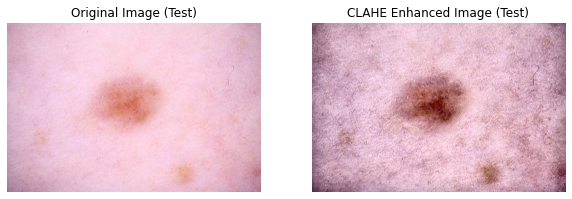

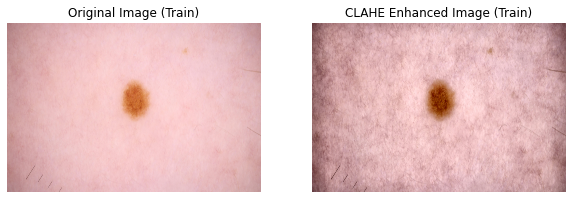

In [15]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function to apply CLAHE to an image
def apply_clahe(image):
    # Convert image to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    
    # Split the LAB image into L, A, and B channels
    l, a, b = cv2.split(lab)
    
    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    
    # Merge the enhanced L channel with the original A and B channels
    enhanced_lab = cv2.merge([cl, a, b])
    
    # Convert the LAB image back to RGB
    enhanced_rgb = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2RGB)
    
    return enhanced_rgb

# Example: Apply CLAHE to the first image in the test dataset
test_folder = 'test_folder'
test_metadata = pd.read_csv('test_dataset.csv')

image_path_test = os.path.join(test_folder, test_metadata['image_name'][0] + '.jpg')
original_image_test = cv2.imread(image_path_test)
original_image_test = cv2.cvtColor(original_image_test, cv2.COLOR_BGR2RGB)

# Apply CLAHE
clahe_image_test = apply_clahe(original_image_test)

# Plot the original and CLAHE-enhanced images for the test dataset
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image (Test)')
plt.imshow(original_image_test)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('CLAHE Enhanced Image (Test)')
plt.imshow(clahe_image_test)
plt.axis('off')

plt.show()

# Example: Apply CLAHE to the first image in the train dataset
train_folder = 'train_folder'
train_metadata = pd.read_csv('train_dataset.csv')

image_path_train = os.path.join(train_folder, train_metadata['image_name'][0] + '.jpg')
original_image_train = cv2.imread(image_path_train)
original_image_train = cv2.cvtColor(original_image_train, cv2.COLOR_BGR2RGB)

# Apply CLAHE
clahe_image_train = apply_clahe(original_image_train)

# Plot the original and CLAHE-enhanced images for the train dataset
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image (Train)')
plt.imshow(original_image_train)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('CLAHE Enhanced Image (Train)')
plt.imshow(clahe_image_train)
plt.axis('off')

plt.show()


In [11]:
pip install tensorflow.keras.models

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.keras.models (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.models


C:\Users\ruthv\anaconda3\lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


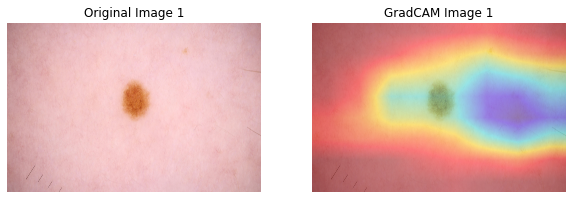

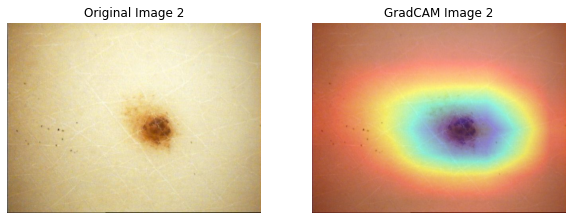

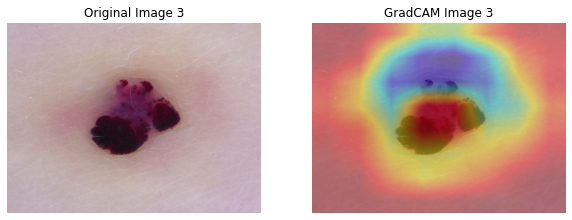

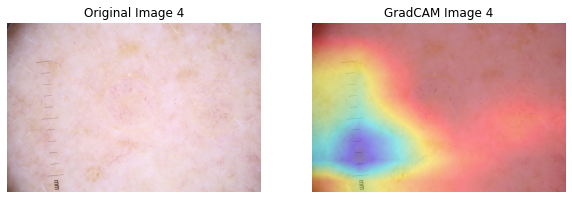

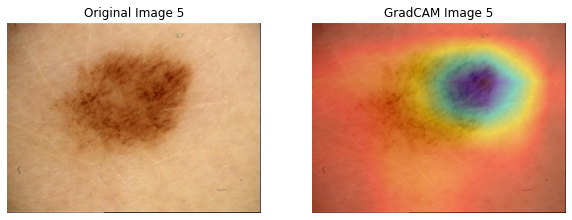

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import backend as K

# Disable eager execution
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# Load the pre-trained InceptionV3 model
model = InceptionV3(weights='imagenet')

# Load the train dataset
train_folder = 'train_folder'
train_metadata = pd.read_csv('train_dataset.csv')

# Choose the layer to visualize (you may need to experiment with different layers)
layer_name = 'mixed10'

# Function to preprocess the image for prediction
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to get the class activation map using GradCAM
def grad_cam(model, img, layer_name):
    # Get the output of the specified layer and the predictions
    preds = model.predict(img)
    class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer(layer_name)

    # Calculate the gradients of the class output with respect to the feature map
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

    pooled_grads_value, conv_layer_output_value = iterate([img])

    # Weight the feature map by the gradients
    for i in range(conv_layer_output_value.shape[-1]):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    # Average the weighted feature map along the channel dimension
    heatmap = np.mean(conv_layer_output_value, axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap

# Function to apply GradCAM to an image and overlay on the original image
def apply_gradcam(img_path, model, layer_name):
    img = preprocess_image(img_path)
    heatmap = grad_cam(model, img, layer_name)

    # Load the original image
    original_img = cv2.imread(img_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    # Resize the heatmap to match the original image size
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))

    # Convert heatmap to RGB
    heatmap = np.uint8(255 * heatmap)

    # Apply heatmap to the original image
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    return superimposed_img

# Visualize GradCAM for the first 5 images in the train dataset
for i in range(5):
    img_path_train = os.path.join(train_folder, train_metadata['image_name'][i] + '.jpg')
    gradcam_image_train = apply_gradcam(img_path_train, model, 'mixed10')

    # Load the original image
    original_img = cv2.imread(img_path_train)[..., ::-1]

    # Plot the original and GradCAM-enhanced images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(f'Original Image {i+1}')
    plt.imshow(original_img)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'GradCAM Image {i+1}')
    plt.imshow(gradcam_image_train, cmap='jet')
    plt.axis('off')

    plt.show()


In [11]:
pip install mediapipe

  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.4
    Uninstalling protobuf-4.23.4:
      Successfully uninstalled protobuf-4.23.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ruthv\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



C:\Users\ruthv\anaconda3\lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


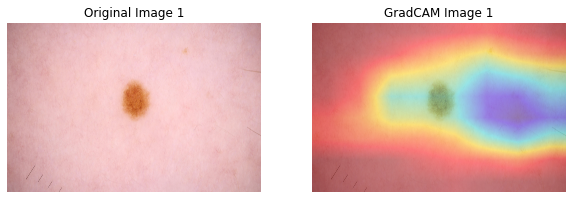

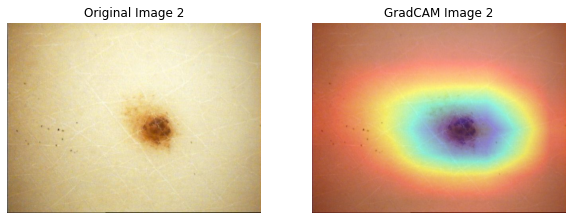

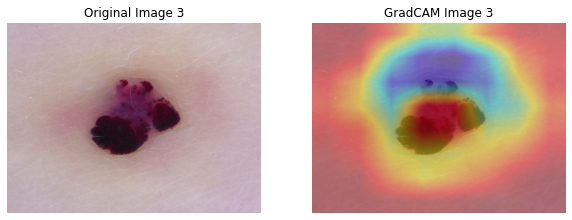

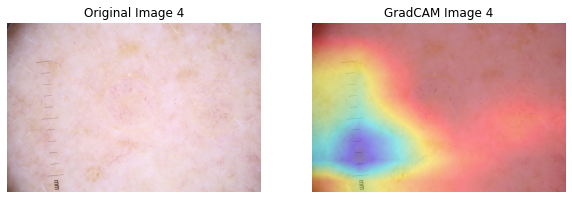

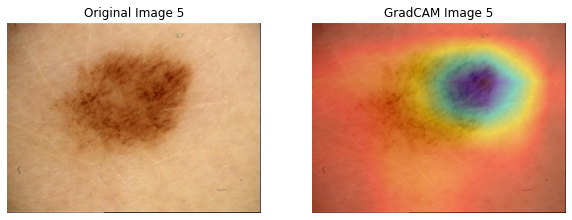

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os  # Add this line to import the os module
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import backend as K

# Disable eager execution
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# Load the pre-trained InceptionV3 model
model = InceptionV3(weights='imagenet')

# Load the train dataset
train_folder = 'train_folder'
train_metadata = pd.read_csv('train_dataset.csv')

# Choose the layer to visualize (you may need to experiment with different layers)
layer_name = 'mixed10'

# Function to preprocess the image for prediction
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to get the class activation map using GradCAM
def grad_cam(model, img, layer_name):
    # Get the output of the specified layer and the predictions
    preds = model.predict(img)
    class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer(layer_name)

    # Calculate the gradients of the class output with respect to the feature map
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

    pooled_grads_value, conv_layer_output_value = iterate([img])

    # Weight the feature map by the gradients
    for i in range(conv_layer_output_value.shape[-1]):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    # Average the weighted feature map along the channel dimension
    heatmap = np.mean(conv_layer_output_value, axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap

# Function to apply GradCAM to an image and overlay on the original image
def apply_gradcam(img_path, model, layer_name):
    img = preprocess_image(img_path)
    heatmap = grad_cam(model, img, layer_name)

    # Load the original image
    original_img = cv2.imread(img_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    # Resize the heatmap to match the original image size
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))

    # Convert heatmap to RGB
    heatmap = np.uint8(255 * heatmap)

    # Apply heatmap to the original image
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    return superimposed_img

# Visualize GradCAM for the first 5 images in the train dataset
for i in range(5):
    img_path_train = os.path.join(train_folder, train_metadata['image_name'][i] + '.jpg')
    gradcam_image_train = apply_gradcam(img_path_train, model, 'mixed10')

    # Load the original image
    original_img = cv2.imread(img_path_train)[..., ::-1]

    # Plot the original and GradCAM-enhanced images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(f'Original Image {i+1}')
    plt.imshow(original_img)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'GradCAM Image {i+1}')
    plt.imshow(gradcam_image_train, cmap='jet')
    plt.axis('off')

    plt.show()


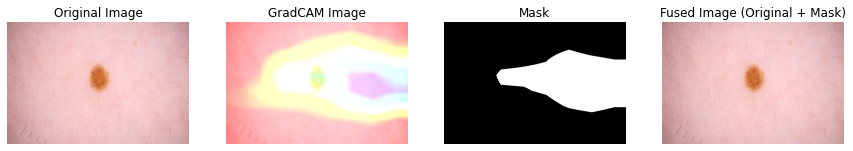

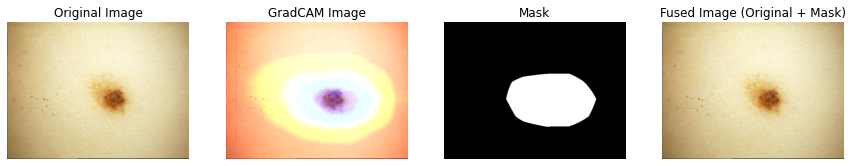

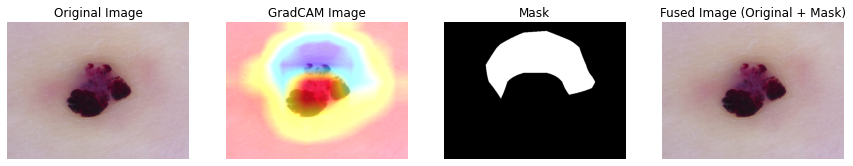

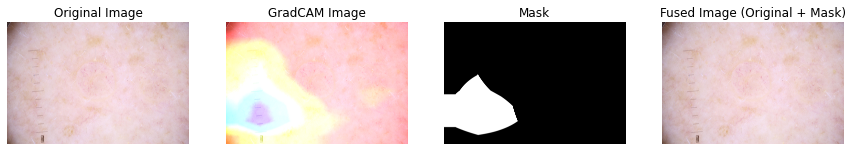

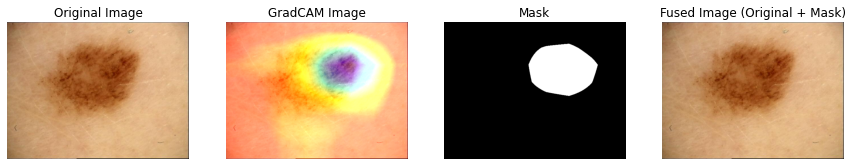

In [34]:
def apply_gradcam_with_mask(img_path, model, layer_name):
    img = preprocess_image(img_path)
    heatmap = grad_cam(model, img, layer_name)

    # Load the original image
    original_img = cv2.imread(img_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    # Resize the heatmap to match the original image size
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))

    # Convert heatmap to RGB
    heatmap = np.uint8(255 * heatmap)
    heatmap_colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Apply heatmap to the original image
    superimposed_img = cv2.addWeighted(original_img, 1, heatmap_colored, 0.6, 0)

    # Create a binary mask from the heatmap
    threshold = 0.5  # You can adjust this threshold as needed
    binary_mask = (heatmap > (threshold * 255)).astype(np.uint8)

    # Apply the binary mask to the original image
    masked_image = cv2.bitwise_and(original_img, original_img, mask=binary_mask)

    # Create a fused image (original image + masked image)
    fused_image = cv2.addWeighted(original_img, 1, masked_image, 0, 0)

    # Plot the original, GradCAM-enhanced, mask, and fused images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.title(f'Original Image')
    plt.imshow(original_img)
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title(f'GradCAM Image')
    plt.imshow(superimposed_img)
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title(f'Mask')
    plt.imshow(binary_mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title(f'Fused Image (Original + Mask)')
    plt.imshow(fused_image)
    plt.axis('off')

    plt.show()

# Visualize GradCAM for the first 5 images in the train dataset with mask and fused image
for i in range(5):
    img_path_train = os.path.join(train_folder, train_metadata['image_name'][i] + '.jpg')
    apply_gradcam_with_mask(img_path_train, model, 'mixed10')


In [2]:

import os
import pandas as pd

# Load your CSV files into pandas DataFrames
test_df = pd.read_csv('test_dataset.csv')
train_df = pd.read_csv('train_dataset.csv')




In [3]:
test_df

,lesion_id,image_name,age,sex,site,target
0,IP_3434100,ISIC_6115394,60.0,female,torso,0
1,HAM_0005321,ISIC_0031816,35.0,female,trunk,0
2,IP_6331820,ISIC_8429099,50.0,female,torso,0
3,IP_9544996,ISIC_6670764,35.0,female,torso,0
4,IP_1273286,ISIC_3357399,50.0,male,torso,0
...,...,...,...,...,...,...
4235,HAM_0000321,ISIC_0032733,70.0,male,back,1
4236,IP_6610197,ISIC_2272218,65.0,male,torso,1
4237,IP_9997715,ISIC_0624498,80.0,female,torso,1
4238,HAM_0000206,ISIC_0033925,65.0,female,upper extremity,1


In [5]:
(test_df["target"] == 0).sum()

3730

In [6]:
(test_df["target"] == 1).sum()

510

In [7]:
merge_df = pd.read_csv('merged_dataset.csv')

In [10]:
(merge_df["target"] == 1).sum()

1697

In [12]:
(merge_df["target"] == 0).sum()

41444